#  Object classification for self-driving cars

In [29]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [30]:
from fastai.vision import *
from fastai.metrics import error_rate

In [31]:
bs = 10

In [32]:
path = '/home/riya/datasets/road_object_classification/train'


In [33]:
!ls $path

animal	green_signal  no_entry_board  red_signal	 stop_sign_board
car	models	      pedestrian      school_sign_board  yellow_signal


In [34]:
os.path.join(path,'animal')

'/home/riya/datasets/road_object_classification/train/animal'

In [35]:
fnames=get_image_files(os.path.join(path,'animal'))
fnames[:5]

[PosixPath('/home/riya/datasets/road_object_classification/train/animal/tmg-article_tall;jpeg_quality=20.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train/animal/1000-road-toll-01.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train/animal/Dead-Bear-on-I-70-near-Eagle-credit-Shane-Macomber-Vail-Daily.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train/animal/nature-3067976_960_720.jpg'),
 PosixPath('/home/riya/datasets/road_object_classification/train/animal/index.jpeg')]

In [36]:
data = ImageDataBunch.from_folder('/home/riya/datasets/road_object_classification/train', train=".", valid_pct=0.2,
        ds_tfms=get_transforms(),bs=bs,size=224,num_workers=2).normalize(imagenet_stats)


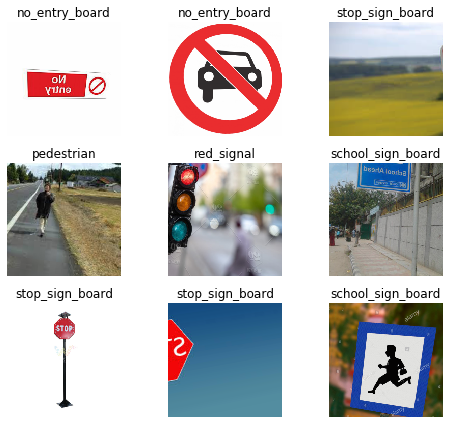

In [37]:
data.show_batch(rows=3, figsize=(7,6))

In [38]:
print(data.classes)
len(data.classes),data.c

['animal', 'car', 'green_signal', 'no_entry_board', 'pedestrian', 'red_signal', 'school_sign_board', 'stop_sign_board', 'yellow_signal']


(9, 9)

In [39]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [40]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [41]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


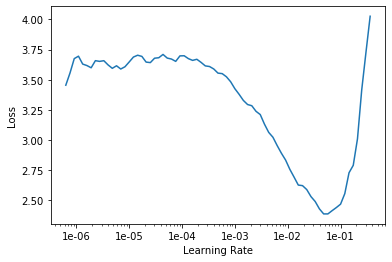

In [42]:
learn.recorder.plot()

In [43]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,3.245408,1.148255,0.342857,00:33
1,2.001696,0.580394,0.228571,00:33
2,1.511536,0.765888,0.228571,00:33
3,1.153233,0.470831,0.228571,00:33
4,0.872558,0.360570,0.171429,00:33
5,0.709208,0.333846,0.142857,00:33


In [44]:
learn.save('stage-1')

In [45]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

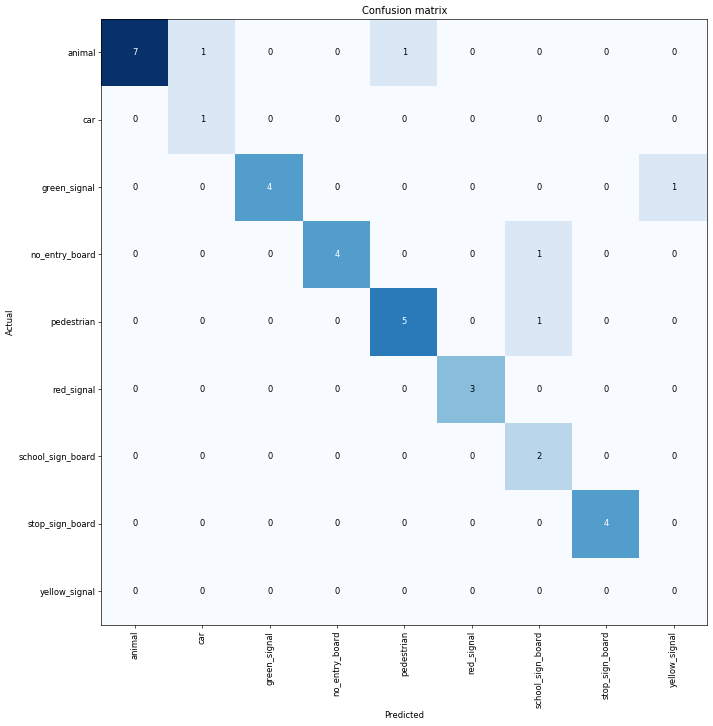

In [46]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

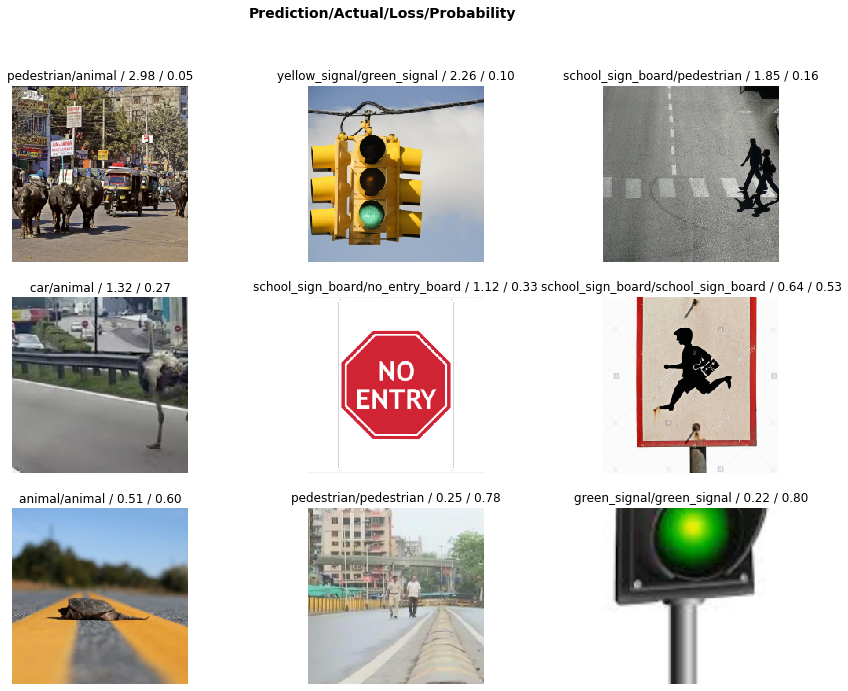

In [47]:
interp.plot_top_losses(9, figsize=(15,11))

In [48]:
learn.unfreeze()

In [49]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


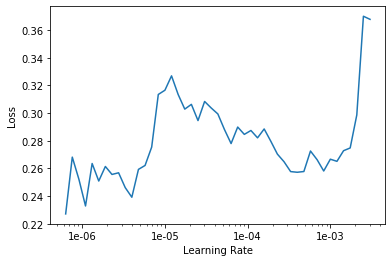

In [50]:
learn.recorder.plot()

That's a pretty accurate model!

In [51]:
learn.fit_one_cycle(15, max_lr=slice(1e-6,1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.304648,0.342271,0.142857,00:46
1,0.345884,0.337621,0.142857,00:46
2,0.273486,0.337993,0.171429,00:46
3,0.279308,0.403142,0.171429,00:46
4,0.309820,0.371570,0.200000,00:46
5,0.325596,0.313793,0.142857,00:47
6,0.302280,0.363989,0.142857,00:47
7,0.305844,0.340495,0.142857,00:47
8,0.286818,0.359676,0.200000,00:47
9,0.280720,0.335475,0.142857,00:47


In [52]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

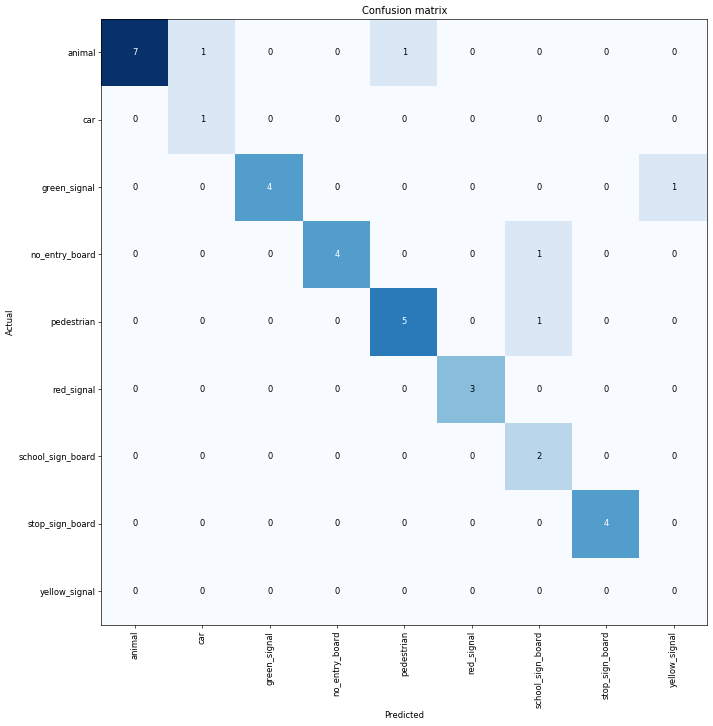

In [53]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

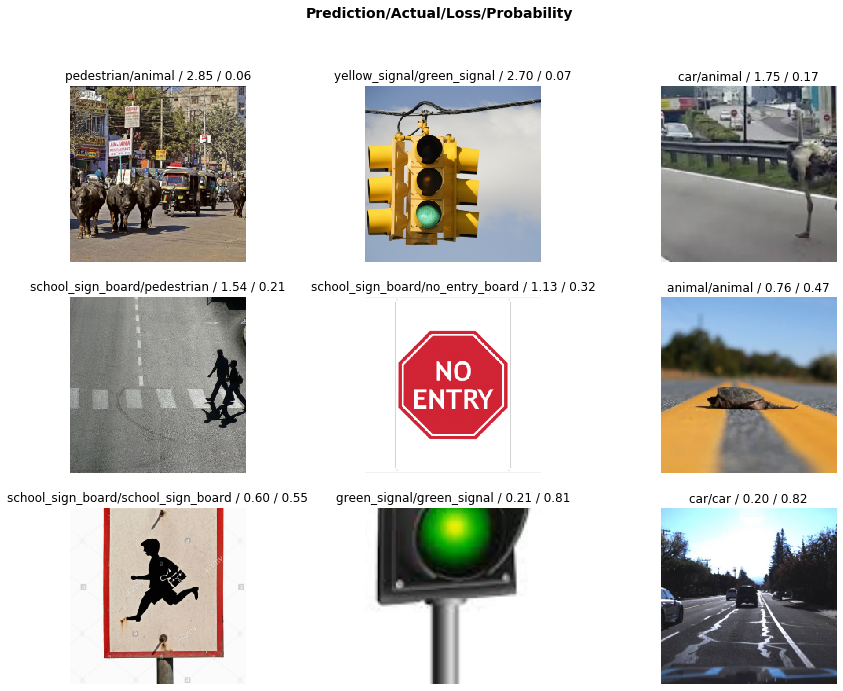

In [54]:
interp.plot_top_losses(9, figsize=(15,11))